In [47]:
import imutils
from imutils import contours
import scipy
from scipy.spatial import distance as dist
import cv2 as cv
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from os import path, listdir
import os, random
import time
import seaborn  as sns
import gc
import sys
import datetime
import csv
import math
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
from collections import defaultdict
import time

In [48]:
import tkinter as tk
from functools import partial
import gui



def main():
    window = tk.Tk()
    window.title('Plants GUI')
    window.geometry('900x600')

    # gui.state['settings']['slider'] = tk.DoubleVar(value=1.0)
    gui.set_state_variables(gui.state)
    gui.state['settings']['slider'] = tk.IntVar(value=1.0)

    # https://stackoverflow.com/a/54068050/1258041
    try:
        try:
            window.tk.call('tk_getOpenFile', '-foobarbaz')
        except tk.TclError:
            pass

        window.tk.call('set', '::tk::dialog::file::showHiddenBtn', '1')
        window.tk.call('set', '::tk::dialog::file::showHiddenVar', '0')
    except:
        pass

    files_frame = tk.Frame()

    raw_dir_lbl = tk.Label(master=files_frame, text="No directory selected", justify='left')
    get_raw_dir_btn = tk.Button(master=files_frame, text="Select image directory",
        command=partial(gui.get_image_dirname, raw_dir_lbl), width=20)


    get_raw_dir_btn.grid(column=0, row=0)  #pack(side=tk.LEFT, anchor=tk.E)
    raw_dir_lbl.grid(column=1, row=0)  #pack(side=tk.LEFT, padx=15, anchor=tk.W)

    template_lbl = tk.Label(master=files_frame, text="Template file not selected", justify='left')
    get_template_btn = tk.Button(master=files_frame, text="Select seed template", command=partial(gui.get_template_file, template_lbl), width=20)

    template_lbl.grid(row=1, column=1)
    get_template_btn.grid(row=1, column=0)  #pack(side=tk.TOP)

    out_dir_lbl = tk.Label(master=files_frame, text="Output directory: " + gui.state['paths']['out_dir'], justify='left')
    get_out_dir_btn = tk.Button(master=files_frame, text="Select output directory",
        command=partial(gui.get_out_dirname, out_dir_lbl), width=20)

    get_out_dir_btn.grid(column=0, row=2)  #pack(side=tk.LEFT, anchor=tk.E)
    out_dir_lbl.grid(column=1, row=2)  #pack(side=tk.LEFT, padx=15, anchor=tk.W)


    files_frame.grid(column=0, row=0, columnspan=2, rowspan=3)

    status_frame = tk.Frame()
    status_frame.grid(column=2, row=0, rowspan=3)

    
    
    raw_file_lbl = tk.Label(master=files_frame, text="No file selected", justify='left')
    get_raw_file_btn = tk.Button(master=files_frame, text="Select image file",
        command=partial(gui.get_file, raw_file_lbl), width=20)


    get_raw_file_btn.grid(column=0, row=4)  #pack(side=tk.LEFT, anchor=tk.E)
    raw_file_lbl.grid(column=1, row=4)  #pack(side=tk.LEFT, padx=15, anchor=tk.W)
    
    
    
    tweak_file_lbl = tk.Label(master=files_frame, text="Tweaking image" , justify='left')
    tweak_file_btn = tk.Button(master=files_frame, text="Tweak image", command=partial(gui.tweak_image, window), width=20)
    tweak_file_btn.grid(column=0, row=5)  #pack(side=tk.LEFT, anchor=tk.E)
    tweak_file_lbl.grid(column=1, row=5)  #pack(side=tk.LEFT, padx=15, anchor=tk.W)
    
    
    rotation_file_lbl = tk.Label(master=files_frame, text="Rotating image" , justify='left')
    rotation_file_btn = tk.Button(master=files_frame, text="Rotate image", command=partial(gui.rotation, window), width=20)
    rotation_file_btn.grid(column=0, row=6)  #pack(side=tk.LEFT, anchor=tk.E)
    rotation_file_lbl.grid(column=1, row=6)  #pack(side=tk.LEFT, padx=15, anchor=tk.W)

    window.mainloop()

if __name__ == '__main__':
    main()


In [40]:
%cd /..
%pwd

C:\


'C:\\'

In [28]:
%cd C:/Users/dasha/morley
    
%pwd

C:\Users\dasha\morley


'C:\\Users\\dasha\\morley'

In [41]:
pip install -e C:/Users/dasha/morley

Obtaining file:///C:/Users/dasha/morley
  Running setup.py develop for morley
Note: you may need to restart the kernel to use updated packages.


In [78]:
!morley

In [91]:
for f in os.scandir('C:\\Users\dasha\morley'):
    if f.is_dir():
        print (f.path)

C:\Users\dasha\morley\.git
C:\Users\dasha\morley\.ipynb_checkpoints
C:\Users\dasha\morley\build
C:\Users\dasha\morley\dist
C:\Users\dasha\morley\morley
C:\Users\dasha\morley\morley.egg-info
C:\Users\dasha\morley\photos
C:\Users\dasha\morley\report
C:\Users\dasha\morley\__pycache__


In [95]:
for f in os.walk('C:\\Users\dasha\morley\photos'):
    print(f[0])

C:\Users\dasha\morley\photos
C:\Users\dasha\morley\photos\4day
C:\Users\dasha\morley\photos\7day
C:\Users\dasha\morley\photos\template


In [53]:
import tkinter as tk
from functools import partial
import gui

def tk2int(var):
    if type(var)==tk.IntVar:
        var = int(var.get())
    else:
        var = int(var)
    return var

def get_state_values(param):
    l=[]
    if param=='settings':
        l.append(2*tk2int(gui.state[param]['morph'])+1)
        l.append(2*tk2int(gui.state[param]['gauss'])+1)
        l.append(tk2int(gui.state[param]['canny_top']))
    else:
        for i in gui.state[param]:
            l.append(tk2int(gui.state[param][i]))
    return l

get_state_values('settings')

[5, 3, 160]

In [119]:
!python setup.py sdist bdist_wheel

python: can't open file 'setup.py': [Errno 2] No such file or directory


In [55]:
!morley --create-shortcut

In [62]:
import tkinter as tk
import os
window = tk.Tk()
# path_to_icon =os.path.join(os.path.dirname(os.path.abspath(__file__)), 'filename_new_params.png') 
# window.tk.call('wm', 'iconphoto', window._w, tk.PhotoImage(file=path_to_icon))
# Add image file
# bg = tk.PhotoImage(file = path_to_icon)

# Create Canvas
canvas1 = tk.Canvas( window, width = 400,
                 height = 400)

canvas1.pack(fill = "both", expand = True)
canvas1.grid

In [71]:
os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(__file__))), 'setup.py')

NameError: name '__file__' is not defined

In [70]:
from .. import setup

ImportError: attempted relative import with no known parent package

In [113]:
sns.dark_palette('Set2')

ValueError: Invalid RGBA argument: 'Set2'

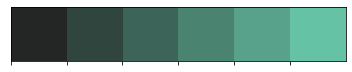

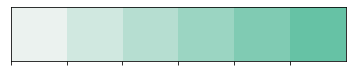

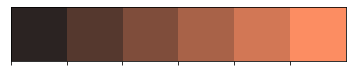

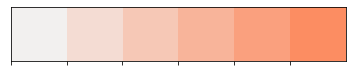

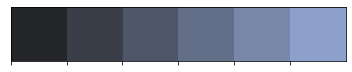

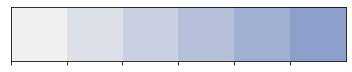

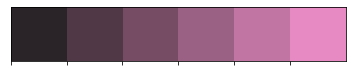

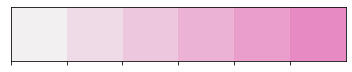

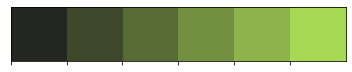

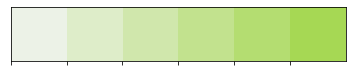

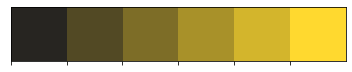

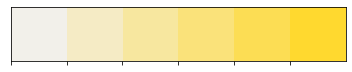

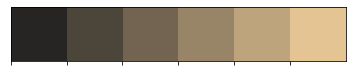

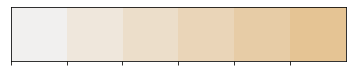

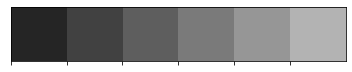

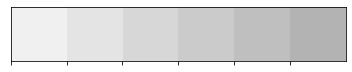

In [128]:
for i in sns.color_palette('Set2'):
    sns.palplot((sns.dark_palette(i)))
    sns.palplot((sns.light_palette(i)))

In [125]:
sns.dark_palette(sns.color_palette('Set2')[0])

[(0.13830797231109143, 0.15059036127668252, 0.1457666990577163),
 (0.19064637784887314, 0.27262915176644403, 0.2460251239520554),
 (0.24298478338665486, 0.39466794225620555, 0.3462835488463945),
 (0.29532318892443654, 0.5167067327459671, 0.44654197374073357),
 (0.34766159446221834, 0.6387455232357286, 0.5468003986350727),
 (0.4, 0.7607843137254902, 0.6470588235294118)]

In [118]:
with sns.color_palette("Set2"):
    sns.relplot(x=x, y=y, hue=hue, s=500, legend=False, height=1.3, aspect=4)

# sns.relplot(x=x, y=y, hue=hue, s=500, legend=False, height=1.3, aspect=4)

NameError: name 'x' is not defined